In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('/kaggle/input/hasil-stress-test/part-00000-da4d3b3f-b56d-46d5-986c-3b3fcb468298-c000.csv')
df.head()

,No,Operation,Volume,Client Workers,Server Type,Server Workers,Total Time,Throughput,Success,Failed
0,1,upload,10,1,thread,1,0.1908,52.4192,1,0
1,2,upload,10,1,thread,5,0.1355,73.8161,1,0
2,3,upload,10,1,thread,50,0.1270,78.7637,1,0
3,4,upload,10,5,thread,1,0.6810,73.4259,5,0
4,5,upload,10,5,thread,5,0.5383,92.8930,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              108 non-null    int64  
 1   Operation       108 non-null    object 
 2   Volume          108 non-null    int64  
 3   Client Workers  108 non-null    int64  
 4   Server Type     108 non-null    object 
 5   Server Workers  108 non-null    int64  
 6   Total Time      108 non-null    float64
 7   Throughput      108 non-null    float64
 8   Success         108 non-null    int64  
 9   Failed          108 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 8.6+ KB


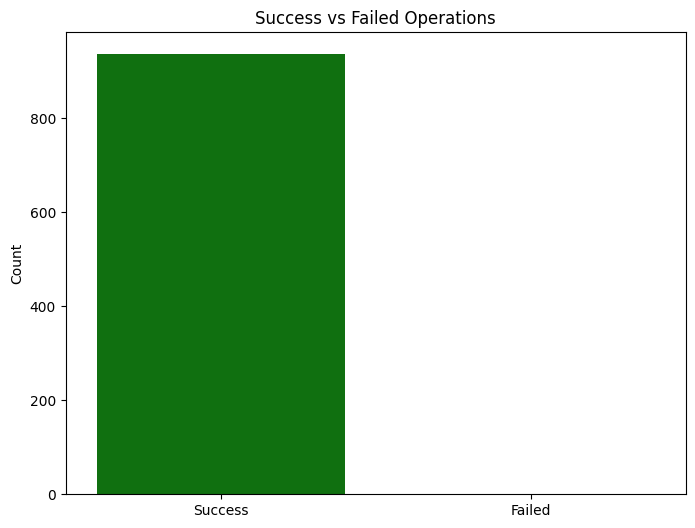

In [11]:
total_success = df['Success'].sum()
total_failed = df['Failed'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Success', 'Failed'], y=[total_success, total_failed], 
            palette=['green', 'red'])
plt.title('Success vs Failed Operations')
plt.ylabel('Count')
plt.show()

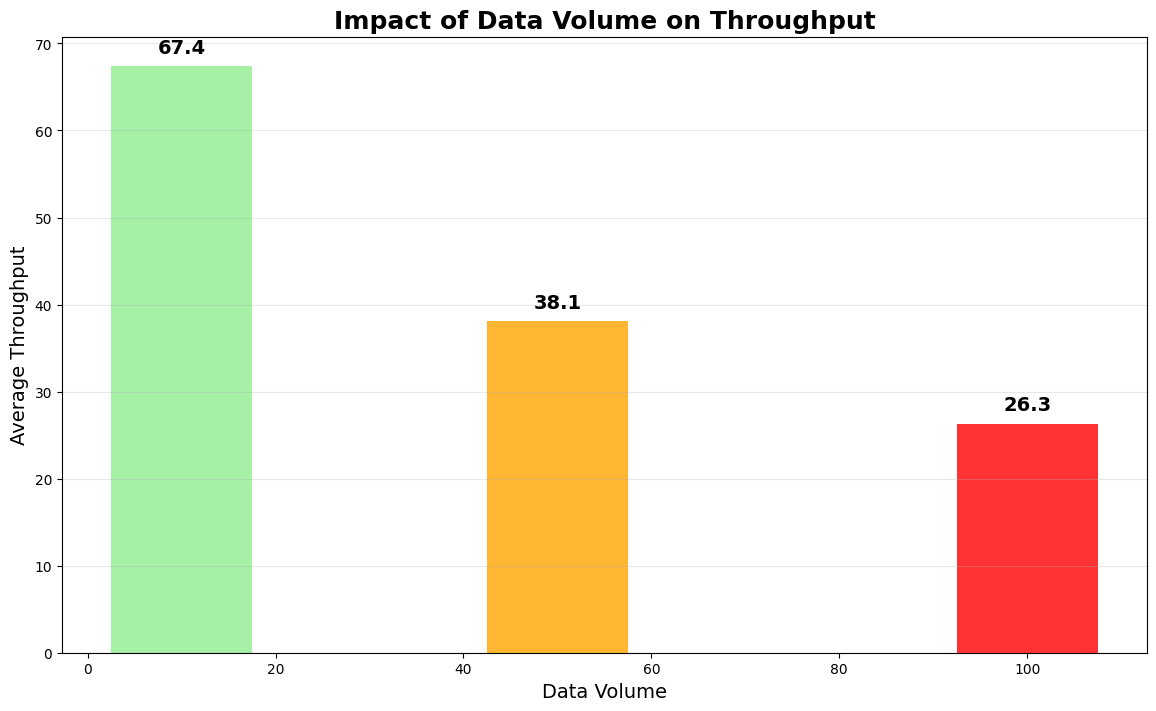

In [4]:
plt.figure(figsize=(14, 8))
volume_throughput = df.groupby('Volume')['Throughput'].mean()
plt.bar([10, 50, 100], volume_throughput.values, color=['lightgreen', 'orange', 'red'], alpha=0.8, width=15)
plt.title('Data Volume vs Throughput', fontsize=18, fontweight='bold')
plt.xlabel('Data Volume', fontsize=14)
plt.ylabel('Average Throughput', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

for i, (vol, tput) in enumerate(zip([10, 50, 100], volume_throughput.values)):
    plt.text(vol, tput + 1, f'{tput:.1f}', ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.show()

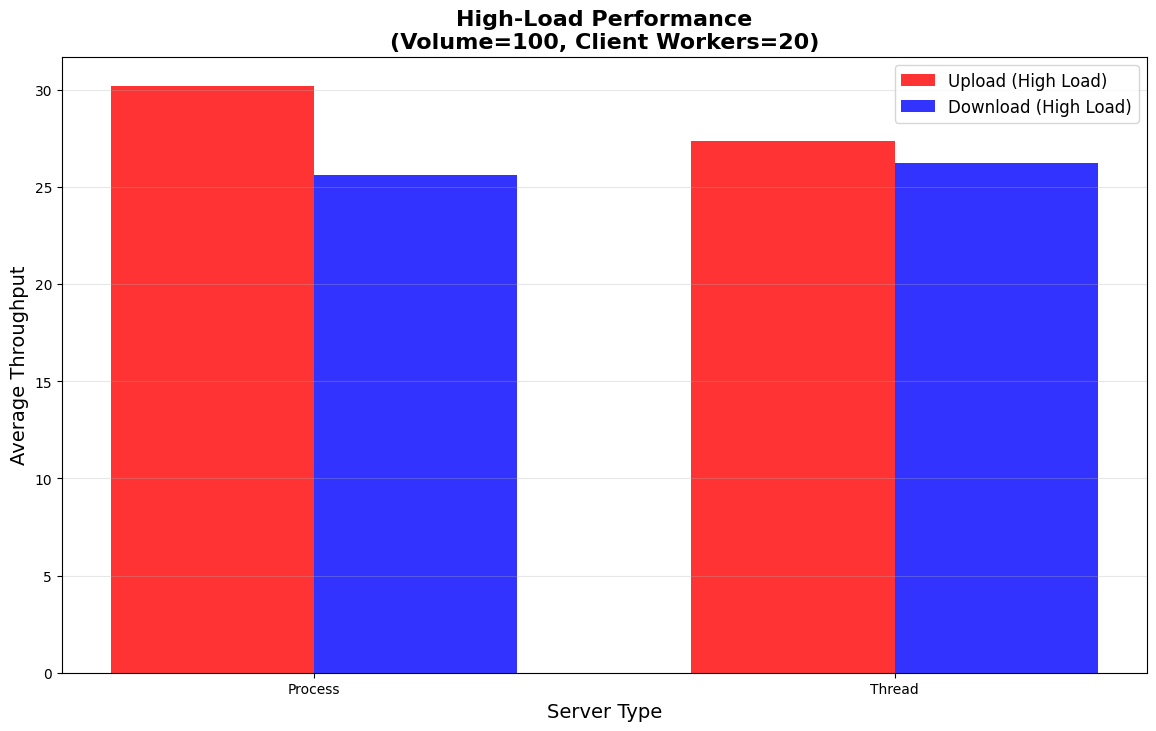

In [5]:
plt.figure(figsize=(14, 8))
high_load_upload = df[(df['Volume'] == 100) & (df['Client Workers'] == 20) & (df['Operation'] == 'upload')].groupby('Server Type')['Throughput'].mean()
high_load_download = df[(df['Volume'] == 100) & (df['Client Workers'] == 20) & (df['Operation'] == 'download')].groupby('Server Type')['Throughput'].mean()

x = np.arange(2)
width = 0.35

bars1 = plt.bar(x - width/2, high_load_upload.values, width, label='Upload (High Load)', color='red', alpha=0.8)
bars2 = plt.bar(x + width/2, high_load_download.values, width, label='Download (High Load)', color='blue', alpha=0.8)

plt.title('High-Load Performance\n(Volume=100, Client Workers=20)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Server Type', fontsize=14)
plt.ylabel('Average Throughput', fontsize=14)
plt.xticks(x, ['Process', 'Thread'])
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')


plt.show()

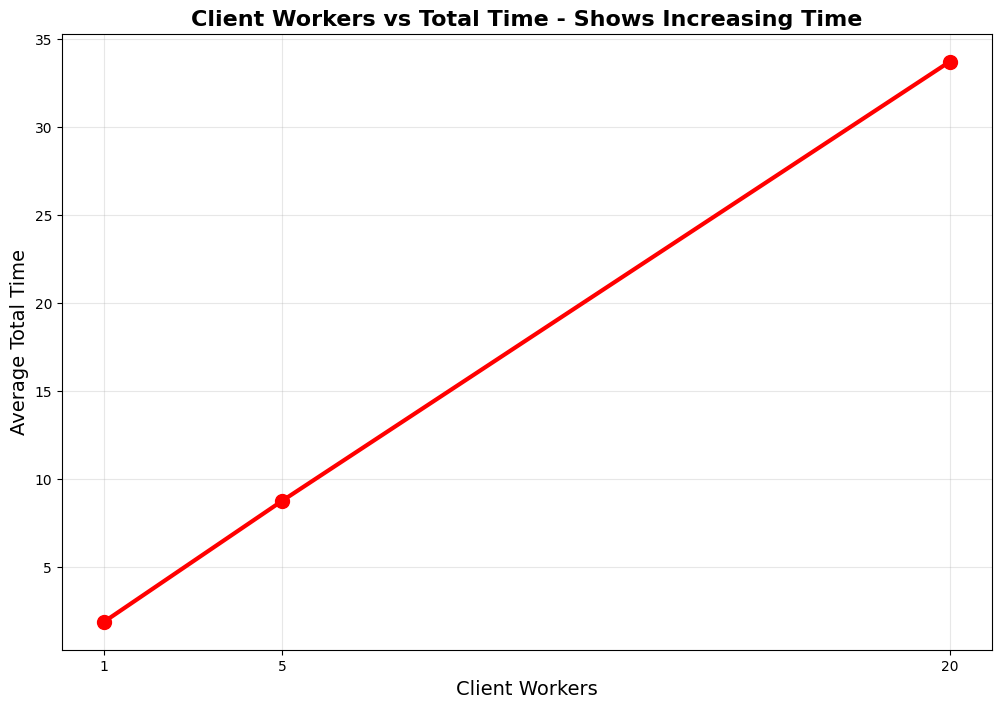

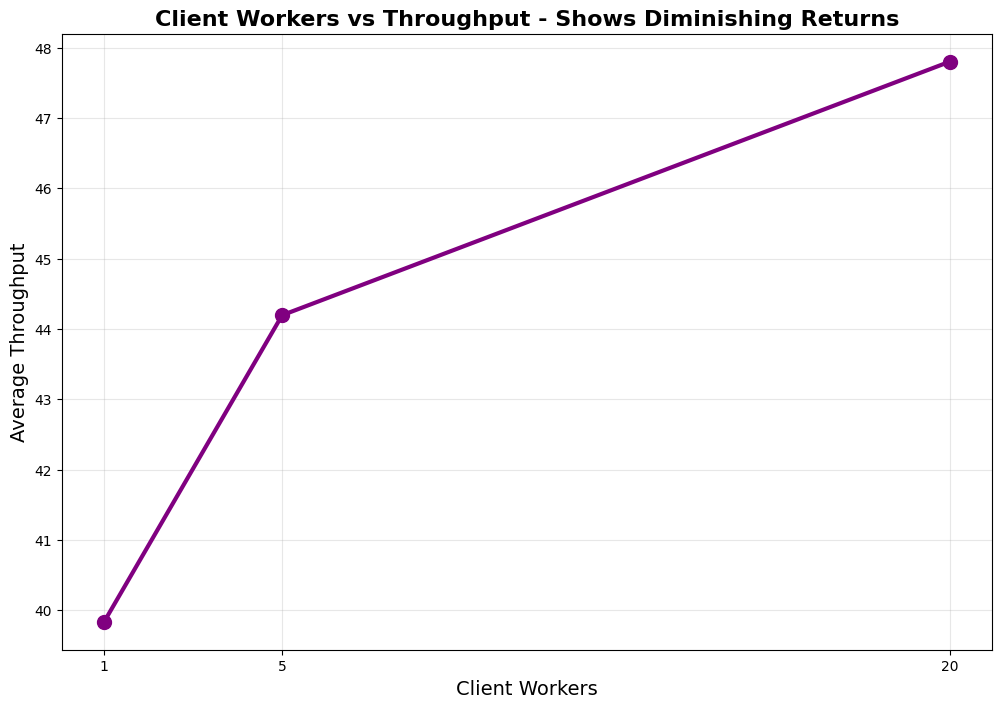

In [13]:
plt.figure(figsize=(12, 8))
client_time = df.groupby('Client Workers')['Total Time'].mean()
plt.plot(client_time.index, client_time.values, 'o-', linewidth=3, markersize=10, color='red')
plt.title('Client Workers vs Total Time - Shows Increasing Time', fontsize=16, fontweight='bold')
plt.xlabel('Client Workers', fontsize=14)
plt.ylabel('Average Total Time', fontsize=14)
plt.xticks([1, 5, 20])
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
client_throughput = df.groupby('Client Workers')['Throughput'].mean()
plt.plot(client_throughput.index, client_throughput.values, 'o-', linewidth=3, markersize=10, color='purple')
plt.title('Client Workers vs Throughput - Shows Diminishing Returns', fontsize=16, fontweight='bold')
plt.xlabel('Client Workers', fontsize=14)
plt.ylabel('Average Throughput', fontsize=14)
plt.xticks([1, 5, 20])
plt.grid(True, alpha=0.3)
plt.show()

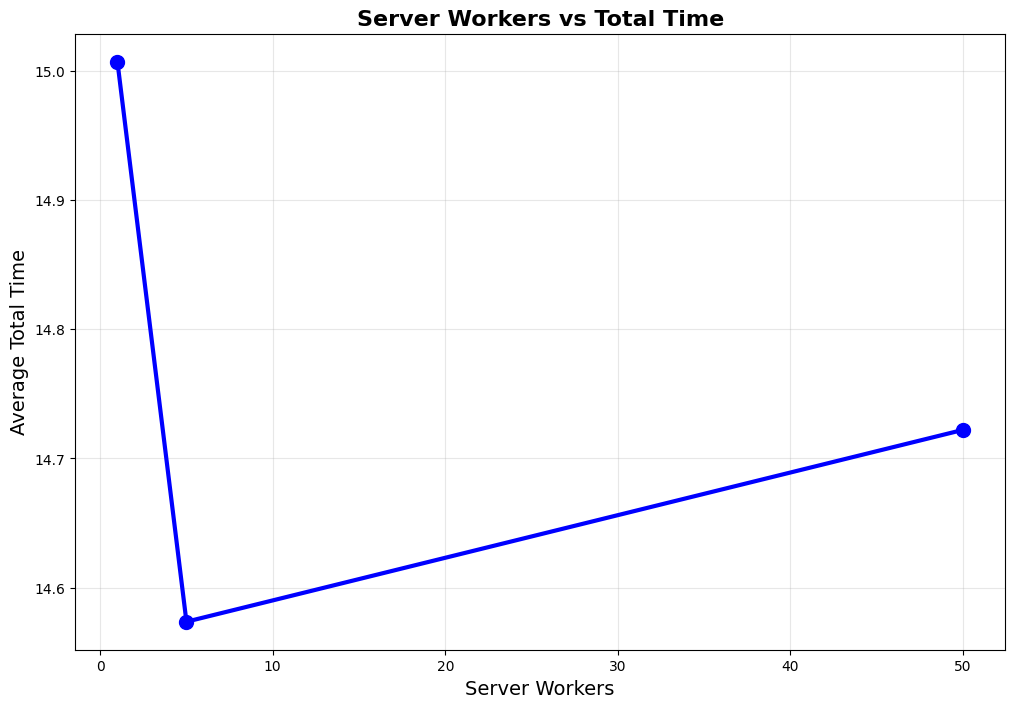

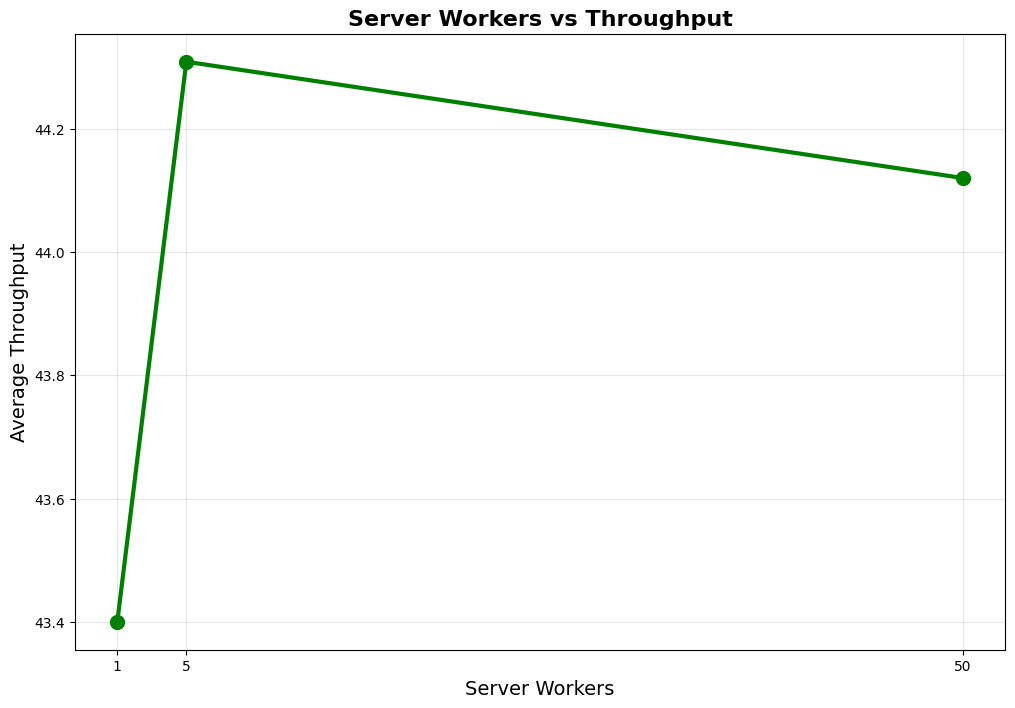

In [14]:
plt.figure(figsize=(12, 8))
server_time = df.groupby('Server Workers')['Total Time'].mean()
plt.plot(server_time.index, server_time.values, 'o-', linewidth=3, markersize=10, color='blue')
plt.title('Server Workers vs Total Time', fontsize=16, fontweight='bold')
plt.xlabel('Server Workers', fontsize=14)
plt.ylabel('Average Total Time', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
server_perf = df.groupby('Server Workers')['Throughput'].mean()
plt.plot(server_perf.index, server_perf.values, 'o-', linewidth=3, markersize=10, color='green')
plt.title('Server Workers vs Throughput', fontsize=16, fontweight='bold')
plt.xlabel('Server Workers', fontsize=14)
plt.ylabel('Average Throughput', fontsize=14)
plt.xticks([1, 5, 50])
plt.grid(True, alpha=0.3)

plt.show()

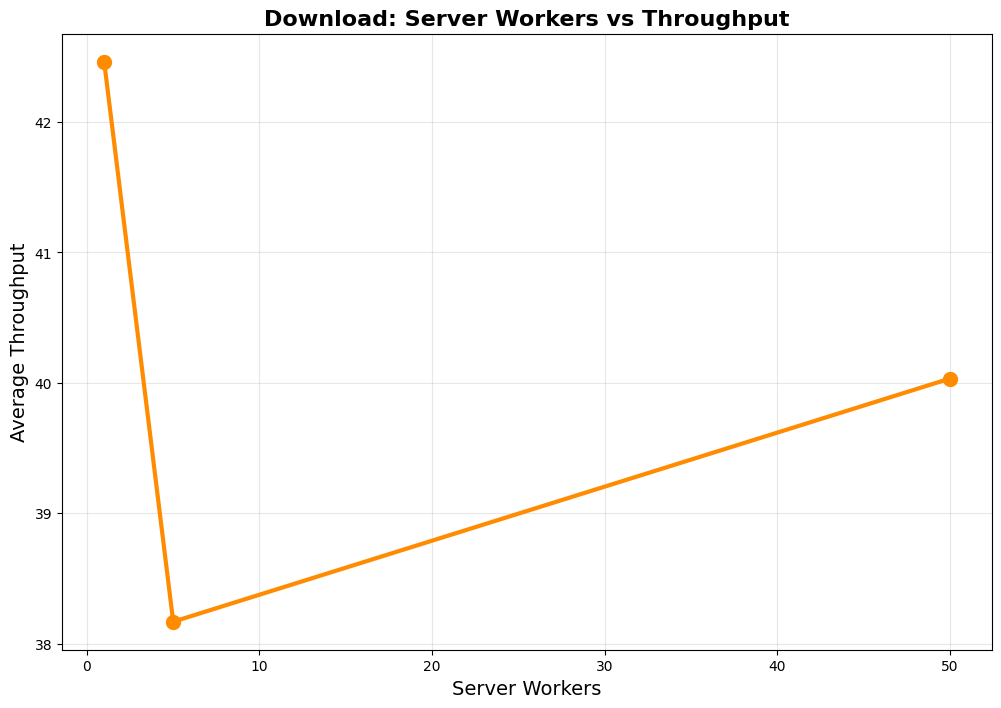

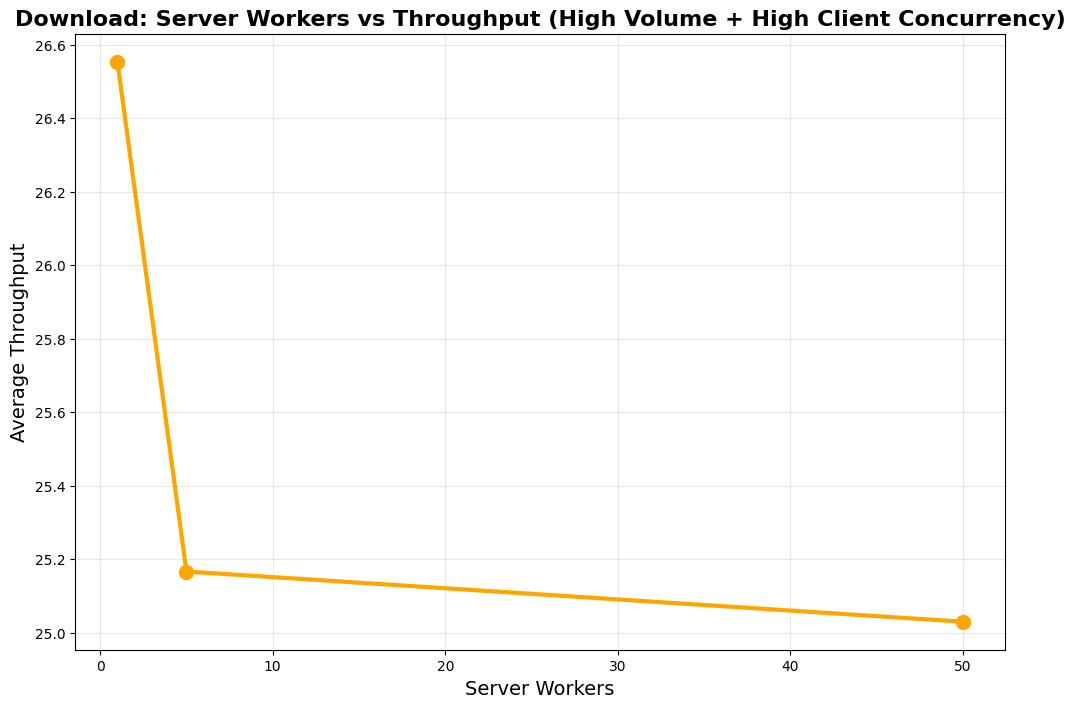

In [21]:
download_data = df[df['Operation'] == 'download']
high_volume_download = download_data[download_data['Volume'] >= download_data['Volume'].quantile(0.75)]
high_client_download = high_volume_download[high_volume_download['Client Workers'] >= 5]

plt.figure(figsize=(12, 8))
all_download_perf = download_data.groupby('Server Workers')['Throughput'].mean()
plt.plot(all_download_perf.index, all_download_perf.values, 'o-', linewidth=3, markersize=10, color='darkorange')
plt.title('Download: Server Workers vs Throughput', fontsize=16, fontweight='bold')
plt.xlabel('Server Workers', fontsize=14)
plt.ylabel('Average Throughput', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
download_server_perf = high_client_download.groupby('Server Workers')['Throughput'].mean()
plt.plot(download_server_perf.index, download_server_perf.values, 'o-', linewidth=3, markersize=10, color='orange')
plt.title('Download: Server Workers vs Throughput (High Volume + High Client Concurrency)', fontsize=16, fontweight='bold')
plt.xlabel('Server Workers', fontsize=14)
plt.ylabel('Average Throughput', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()